In [5]:
import math
import warnings

from IPython.display import display
from matplotlib import pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
from scipy.stats import mstats
from sklearn import linear_model
%matplotlib inline
pd.options.display.float_format = '{:.3f}'.format

# Suppress annoying harmless error.
warnings.filterwarnings(
    action="ignore",
    module="scipy",
    message="^internal gelsd"
)


In [6]:
data = 'https://tf-curricula-prod.s3.amazonaws.com/data-science/Advertising.csv'
data = pd.read_csv(data, index_col=0)
data.head()

,TV,Radio,Newspaper,Sales
1,230.100,37.800,69.200,22.100
2,44.500,39.300,45.100,10.400
3,17.200,45.900,69.300,9.300
4,151.500,41.300,58.500,18.500
5,180.800,10.800,58.400,12.900


In [7]:
linear_formula = 'Sales ~ TV+Radio+Newspaper'

# Fit the model to our data using the formula.
lm = smf.ols(formula=linear_formula, data=data).fit()

NameError: name 'smf' is not defined

In [8]:
lm.params

NameError: name 'lm' is not defined

In [9]:
lm.pvalues

NameError: name 'lm' is not defined

In [ ]:
lm.rsquared

In [ ]:
lm.conf_int()

In [ ]:
#try running tests without newspaper
# compare how results differ

linear_formula = 'Sales ~TV + Radio'
lm = smf.ols(formula=linear_formula, data=data).fit()

In [ ]:
lm.params

In [ ]:
lm.pvalues

In [ ]:
lm.rsquared

In [ ]:
lm.conf_int()

In [ ]:
prstd, iv_l, iv_u = wls_prediction_std(lm)

plt.figure()
plt.plot(iv_u[0:15], 'o', color='r')
plt.plot(iv_l[0:15], 'o', color='r')
plt.plot(lm.fittedvalues[0:15], 'o', color='b')
plt.title('blue: predicted, red: 95% CI')
plt.show()

# Crime Data for NYC (2013)
"crime1" is the original data set while crime2013 is the new data set tailored t our project, documenting the features from the 
 NYC crime report relevant to this project (Population, Murder, Robber, Property_Crime)

In [ ]:


crime1 = pd.read_csv(r'C:/Users/ezzan/Downloads/python_drills/police drill.csv')

crime1 = crime1[0:348]
crime1= crime1.fillna(value=0)

crime2013 = []
crime2013 = crime1[['Population']]
crime2013['Murder'] = crime1[['Murder and\nnonnegligent\nmanslaughter']]
crime2013['Robbery'] = crime1[['Robbery']]
crime2013['Property_Crime'] = crime1[['Property\ncrime']]
crime2013


In order to analyze the data significant cleaning had to be done, including removing any non numerical figures and converting all strings into numbers. Additionaly we added a new column of population squared and any time a murder or robbery was documented we lableled it as 1 (robbery was commited) and 0 (was not commited)

In [ ]:
#
crime2013['Population'] = crime2013.Population.str.replace(',','')
crime2013['Property_Crime'] = crime2013.Property_Crime.str.replace(',','')
crime2013['Robbery'] = crime2013.Robbery.str.replace(',','')

crime2013['Population'] = pd.to_numeric(crime2013['Population'])
crime2013['Robbery'] = pd.to_numeric(crime2013['Robbery'])
crime['Murder'] = pd.to_numeric(crime2013['Murder'])
crime2013['Property_Crime'] = pd.to_numeric(crime2013['Property_Crime'])

crime2013['Population_Sqrd'] = np.square(crime2013['Population'])
crime2013['Murder'] = np.where(crime2013['Murder'] >= 1, 1, 0)
crime2013['Robbery'] = np.where(crime2013['Robbery'] >= 1, 1, 0)


In [ ]:
crime1['per_capita'] = crime1['Property_Crime']/crime1['Population']
crime1.drop(216, inplace = True)


In [ ]:


crime1["Property_Crime"] = mstats.winsorize(crime1["Property_Crime"], limits=0.05)
plt.figure(figsize=(10,10))
plt.scatter(crime1["Property_Crime"], crime1["Population"])


In [ ]:
crime1["Property_Crime"] = mstats.winsorize(crime1["Property_Crime"], limits=0.05)
plt.figure(figsize=(10,10))
plt.scatter(crime1["Property_Crime"], crime1["Population_Sqrd"])

In [ ]:
crime1.boxplot(column = 'Population')

In [ ]:
linear_formula = 'Property_Crime ~ Murder+Robbery'

# Fit the model to our data using the formula.
lm = smf.ols(formula=linear_formula, data=crime2013).fit()

In [ ]:
lm.params

In [179]:
lm.pvalues

Intercept   0.049
Murder      0.000
Robbery     0.000
dtype: float64

In [180]:
lm.rsquared

0.4419481341584982

In [181]:
lm.conf_int()

,0,1
Intercept,0.120,91.770
Murder,394.277,571.011
Robbery,209.202,333.722


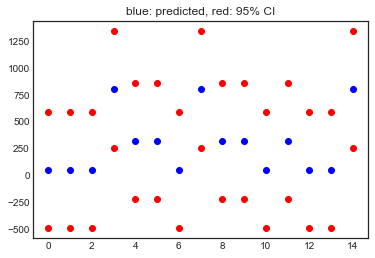

In [182]:
prstd, iv_l, iv_u = wls_prediction_std(lm)

plt.figure()
plt.plot(iv_u[0:15], 'o', color='r')
plt.plot(iv_l[0:15], 'o', color='r')
plt.plot(lm.fittedvalues[0:15], 'o', color='b')
plt.title('blue: predicted, red: 95% CI')
plt.show()

#  Data set for NYC Crimes (2014)
We will now introduce a new data set featuring the crimes recorded in different cities in NY oveer the year 2014. All the features in this set are identical to the data set that was recorded above, giving us the ability to perform the same exact test we performed earlier along with the ability to compare the two sets.

In [196]:
crime14 = pd.read_csv('C://Users/ezzan/Downloads/Table_8_Offenses_Known_to_Law_Enforcement_by_New_York_by_City_2014.csv')


In [199]:
crime14= crime14[0:369]
crime2014 = crime14.fillna(value=0)
crime2014 = []
crime2014 = crime14[['Population']]
crime2014['Murder'] = crime14[['Murder and\nnonnegligent\nmanslaughter']]
crime2014['Robbery'] = crime14[['Robbery']]
crime2014['Property_Crime'] = crime14[['Property\ncrime']]
crime2014


c:\users\ezzan\appdata\local\programs\python\python36-32\lib\site-packages\ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """
c:\users\ezzan\appdata\local\programs\python\python36-32\lib\site-packages\ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
c:\users\ezzan\appdata\local\programs\python\python36-32\lib\site-packages\ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead



,Population,Murder,Robbery,Property_Crime
0,"1,851",0.000,0,11
1,"2,568",0.000,1,49
2,820,0.000,0,1
3,"2,842",0.000,0,17
4,"98,595",8.000,237,"3,888"
5,"5,872",0.000,2,204
6,"1,107",0.000,0,7
7,"4,032",1.000,0,30
8,"1,723",0.000,0,2
9,"118,860",1.000,43,"2,066"


In [200]:
crime2014['Population'] = crime2014.Population.str.replace(',','')
crime2014['Property_Crime'] = crime2014.Property_Crime.str.replace(',','')
crime2014['Robbery'] = crime2014.Robbery.str.replace(',','')
crime2014['Population'] = pd.to_numeric(crime2014['Population'])
crime2014['Robbery'] = pd.to_numeric(crime2014['Robbery'])
crime2014['Murder'] = pd.to_numeric(crime2014['Murder'])
crime2014['Property_Crime'] = pd.to_numeric(crime2014['Property_Crime'])


c:\users\ezzan\appdata\local\programs\python\python36-32\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.
c:\users\ezzan\appdata\local\programs\python\python36-32\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
c:\users\ezzan\appdata\local\programs\python\python36-32\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .lo

In [215]:
crime2014['Population_Sqrd'] = np.square(crime2014['Population'])
crime2014['Murder'] = np.where(crime2014['Murder'] >= 1, 1, 0)
crime2014['Robbery'] = np.where(crime2014['Robbery'] >= 1, 1, 0)
crime2014 = crime2014.sort_values('Population',ascending= False)
crime2014.head(10)

,Population,Murder,Robbery,Property_Crime,Population_Sqrd
38,258419,1,1,1401.000,66780379561
283,210347,1,1,1401.000,44245860409
366,200624,1,1,1401.000,40249989376
326,144534,1,1,1401.000,20890077156
9,118860,1,1,1401.000,14127699600
4,98595,1,1,1401.000,9720974025
130,97144,1,1,1401.000,9436956736
279,88881,0,1,643.000,7899832161
62,81435,1,1,1401.000,6631659225
225,80030,1,1,1213.000,6404800900


# Scatterplots comparing Property Crimes with Population (Crime 2014)

Featured are two scatterplots comparing propertycrimes with the quantity of population and the population squared. These plots will help us detect if there is a close correlation between the two values. In order to avoid outliers such as heavily populated I generated another scatter plot comapring Property Crimes in relation to Population for all populations under 100,000 people.

In [214]:
#over100k= crime2014.loc[lambda crime2014: crime2014['Population'] > 100000, :]
under100k= crime2014.loc[lambda crime2014: crime2014['Population'] < 100000, :]


c:\users\ezzan\appdata\local\programs\python\python36-32\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


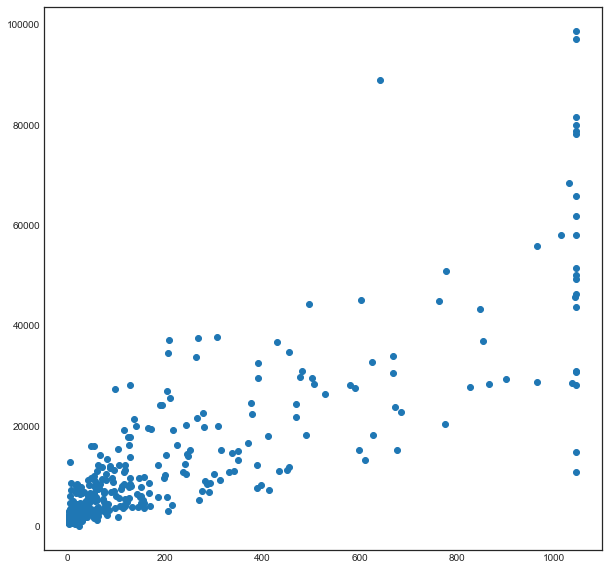

In [211]:
under100k["Property_Crime"] = mstats.winsorize(under100k["Property_Crime"], limits=0.05)
plt.figure(figsize=(10,10))
plt.scatter(under100k["Property_Crime"], under100k["Population"])

c:\users\ezzan\appdata\local\programs\python\python36-32\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


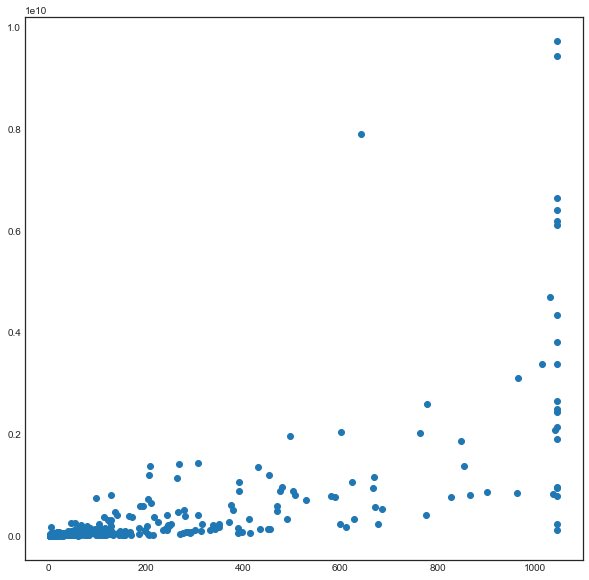

In [213]:
under100k["Property_Crime"] = mstats.winsorize(under100k["Property_Crime"], limits=0.05)
plt.figure(figsize=(10,10))
plt.scatter(under100k["Property_Crime"], under100k["Population_Sqrd"])

## Box plot with all populations (2014)

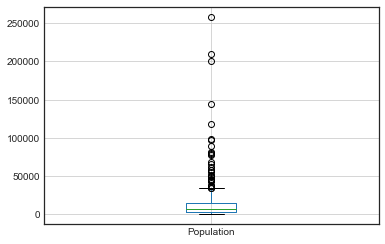

In [217]:
crime2014.boxplot(column = 'Population')

## Box plot with populations under 100,000 (2014)

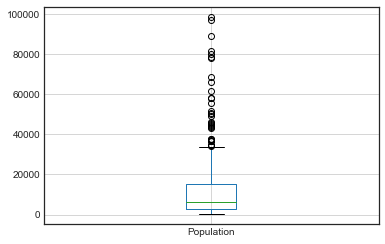

In [216]:
under100k.boxplot(column = 'Population')

In [218]:
regr = linear_model.LinearRegression()
Y = under100k["Property_Crime"]
X = under100k[["Population", "Murder", "Robbery"]]
regr.fit(X, Y)

# Inspect the results.
print('\nCoefficients:')
print(regr.coef_)
print('\nIntercept:')
print(regr.intercept_)
print('\nR-squared:')
print(regr.score(X, Y))


Coefficients:
[1.40171743e-02 1.82572095e+02 9.33986016e+01]

Intercept:
-23.14832290628064

R-squared:
0.7423062152813669


In [219]:
linear_formula = 'Property_Crime ~ Murder+Robbery'

# Fit the model to our data using the formula.
lm = smf.ols(formula=linear_formula, data=under100k).fit()

In [220]:
lm. params

Intercept    27.982
Murder      502.028
Robbery     255.501
dtype: float64

In [221]:
lm.pvalues

Intercept   0.136
Murder      0.000
Robbery     0.000
dtype: float64

In [222]:
lm.rsquared

0.48265436757468194

In [223]:
lm.conf_int()

,0,1
Intercept,-8.844,64.808
Murder,421.470,582.585
Robbery,202.349,308.654


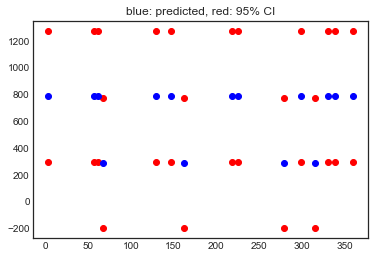

In [224]:
prstd, iv_l, iv_u = wls_prediction_std(lm)

plt.figure()
plt.plot(iv_u[0:15], 'o', color='r')
plt.plot(iv_l[0:15], 'o', color='r')
plt.plot(lm.fittedvalues[0:15], 'o', color='b')
plt.title('blue: predicted, red: 95% CI')
plt.show()